# Анализ эффективности работы сети магазинов строительных материалов «Строили, строили и наконец построили»

## Материалы

Презентация: https://yadi.sk/i/P8ZiRpA4ZCVYyA

## Цели исследования:

    Увеличение продаж и выручки сети, используя программу лояльности.
    Увеличение уровня продаж и выручки магазинов сети.

## Задачи исследования:

1.Анализ успешности применениея программы лояльности. Выработка рекомендаций по ее оптимизации либо прекращении действия программы. 
2.Анализ эффективности работы магазинов сети. Определение низкоэффективных магазинов. Выработка рекомендаций по увеличению продаж либо по закрытию низкоэффективных магазинов.

## Гипотезы исследования:

1. Покупатели, участвующие в программе лояльности, в среднем покупают большее количество товаров, чем покупатели, не участвующие в программе лояльности.
2. Покупатели, участвующие в программе лояльности, в среднем покупают товаров на сумму большую, чем покупатели, не участвующие в программе лояльности.
3. Магазины сети показывают разную степень эффективности (уровень продаж).

## План

1. Открытие файла с данными и изучение общей информации
2. Подготовка данных
3. Изучение и проверка данных
4. Анализ успешности применениея программы лояльности
5. Анализ эффективности работы магазинов сети
6. Общие выводы

## 1. Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import warnings
data = pd.read_csv('/datasets/retail_dataset.csv')
codes = pd.read_csv('/datasets/product_codes.csv')
data.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
ShopID             105335 non-null object
loyalty_program    105335 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [3]:
data.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


In [4]:
codes.head()

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [5]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
productID        9969 non-null object
price_per_one    9969 non-null float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [6]:
codes.describe()

,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


In [7]:
print(data.duplicated().sum())# проверка на дубли
print(data.isna().sum())# проверка на пропуски
print(codes.duplicated().sum()) 
print(codes.isna().sum())# 

1033
purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
ShopID                 0
loyalty_program        0
dtype: int64
0
productID        0
price_per_one    0
dtype: int64


In [8]:
print(data['loyalty_program'].value_counts())

0.0    81493
1.0    23842
Name: loyalty_program, dtype: int64


In [9]:
print(data['ShopID'].value_counts())

Shop 0     97393
Shop 4      1741
Shop 1      1540
Shop 6      1032
Shop 8       560
Shop 3       492
Shop 7       312
Shop 10      299
Shop 12      278
Shop 18      256
Shop 2       253
Shop 5       179
Shop 11      169
Shop 14      154
Shop 19       74
Shop 9        61
Shop 15       60
Shop 16       59
Shop 25       57
Shop 26       56
Shop 27       45
Shop 22       40
Shop 17       40
Shop 13       35
Shop 24       32
Shop 21       32
Shop 28       30
Shop 20       30
Shop 30       15
Shop 29        9
Shop 23        2
Name: ShopID, dtype: int64


In [10]:
print(codes['productID'].value_counts().head(10))

DOT          174
M             59
S             29
POST          15
D             13
79321         11
84406B        10
47566         10
AMAZONFEE      9
21673          9
Name: productID, dtype: int64


Выводы 

Данные загружены. Выведена информация о данных. Выведены первые значения переменных. В основной таблице (data) есть пропуски в столбце CustomerID, об этом свидетельствует количество значений в указанной переменной. Также в основной таблице есть дубли. Несколько переменных нуждаются в изменении названией (в целях удобства) и типа: поле purchasedate - из object в datetime, т.к. это поле дат; CustomerID и loyalty_program из float в object, т.к. это качественные характеристики. Также нужно скорректировать названия столбцов в таблицах hypothesis и visitors, чтобы они состояли из прописных букв. Обращает на себя внимание наличие нулей в столбце Quantity таблицы data, это аналог пропусков. Попробуем их заполнить. Также в столбце Quantity есть отрицательные и очень высокие значения. Проверим, нет ли в столбце loyalty_program неожиданных значений. Их нет. Посчитаем количество магазинов: их 31. В таблице codes есть коды товаров, которым соответствует несколько цен. Нужно исправить.

## 2. Подготовка данных

In [11]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         104302 non-null object
item_ID            104302 non-null object
Quantity           104302 non-null int64
purchasedate       104302 non-null object
CustomerID         68154 non-null float64
ShopID             104302 non-null object
loyalty_program    104302 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.4+ MB


Удаляем дублирующиеся строки из таблицы data. Проверяем.

In [12]:
data = data.rename({'purchaseid': 'check_id', 'item_ID': 'item_id', 'Quantity': 'quantity',
                    'purchasedate': 'datetime','CustomerID': 'customer_id',  
                    'ShopID': 'shop_id','loyalty_program': 'loyalty_pr'}, axis = 1)
data.head()

,check_id,item_id,quantity,datetime,customer_id,shop_id,loyalty_pr
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [13]:
codes = codes.rename({'productID': 'item_id', 'price_per_one': 'price'}, axis = 1)
codes.head()

,item_id,price
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


Переименовываем столбцы в таблицах. Проверяем.

In [14]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%dT%H:%M:%S')
data['customer_id'] = data['customer_id'].astype(object)
data['loyalty_pr'] = data['loyalty_pr'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
check_id       104302 non-null object
item_id        104302 non-null object
quantity       104302 non-null int64
datetime       104302 non-null datetime64[ns]
customer_id    68154 non-null object
shop_id        104302 non-null object
loyalty_pr     104302 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.4+ MB


Изменяем типы переменных: поле date - из object в datetime, customer_id и loyalty_pr из float в object. Проверяем.

In [15]:
data_null = data[data['customer_id'].isna()]# выделяем строки с пропусками в столбце customer_id
data_null_check = data_null.loc[:, 'check_id'] # выделяем столбец с номерами чеков
data_null_check = data_null_check.drop_duplicates()# удаляем дубли
data_null_check = data_null_check.reset_index()
data_null_check.head()

,index,check_id
0,6,540468
1,7,541424
2,8,538883
3,11,541696
4,16,539744


In [16]:
data_all_check = data.loc[:, ['check_id', 'customer_id']]# выделяем из исходной таблицы номера чеков и коды покупателей
data_all_check = data_all_check.dropna()# удаляем пропуски
data_all_check = data_all_check.drop_duplicates()# удаляем дубли
data_all_check.head()

,check_id,customer_id
0,538280,18427
1,538862,22389
2,538855,22182
3,543543,23522
4,543812,23151


In [17]:
data_fill_null = data_null_check.merge(data_all_check, on = 'check_id')# объединяем таблицы 
data_fill_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
index          0 non-null int64
check_id       0 non-null object
customer_id    0 non-null object
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


Для заполнения пропусков в столбце customer_id попробуем идентифицировать покупателей через номера чеков: если идентифицированный покупатель получил чек по одному из товаров, то по номеру этого чека можно заполнить пропуски.
К сожалению, таким образом заполнить пропуски не удалось: не найдены соответствия между чеками идентифицированных и неидентифицированных покупателей.
Рассматривалась возможность идентифицировать пропуски через магазин, программу лояльности, дату и время выдачи чека, но в данном случае, если такие соответствия найдутся, это будет не достоверной информацией, т.к. идентифицированный и неидентифицированный покупатели могут осуществить покупку в одном магазине и в одно и то же время, но на разных кассах.
В результате будем анализировать полный массив данных и массив данных, очищенный от строк с пропусками.

In [18]:
data['date'] = data['datetime'].dt.date
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 8 columns):
check_id       104302 non-null object
item_id        104302 non-null object
quantity       104302 non-null int64
datetime       104302 non-null datetime64[ns]
customer_id    68154 non-null object
shop_id        104302 non-null object
loyalty_pr     104302 non-null object
date           104302 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 7.2+ MB


In [19]:
print(data[['item_id', 'quantity']].sort_values(by='quantity' ,ascending = False))

       item_id  quantity
69074    23166     74214
31974    37413      5567
104734   22053      3905
38595    21108      3113
12719    84077      2879
...        ...       ...
53844    22351     -1401
10687   84611B     -1431
104960   22617     -2601
39345    84347     -9361
49411    23166    -74216

[104302 rows x 2 columns]


Рассмотрим переменную quantity (количество) в связке с переменной item_id. Как видно, в переменной quantity присутствую отрицательные значения. Скорее всего, это техническая ошибка при обработке баз данных и знак минус дожен быть заменен на знак плюс. Вместе с тем, обращают на себя внимание самое крупное положительное и самое крупное отрицательное значения переменной quantity. Они почти равны. Видимо, кассир при пробитии чека ошибся и попытался сделать сторнирующий чек по тому же товару, но опять ошибся в последнем знаке. Исходя из этого, указанные значения (самое крупное положительное и самое крупное отрицательное значения переменной quantity) будут удалены.

In [20]:
data['quantity'] = abs(data['quantity'])
data = data[data['quantity']<70000]
data.describe()

,quantity
count,104300.000000
mean,8.752550
std,54.627902
min,0.000000
25%,0.000000
50%,2.000000
75%,8.000000
max,9361.000000


Т.к. отрицательные значения столбца quantity, скорее всего, техническая ошибка, меняем знак "минус" на знак "плюс".
Удаляем строки по товару "23166" с аномально высокими значениями переменной quantity. Проверяем.

In [21]:
data_corr = data.dropna()
data_corr.info()
data_corr.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68152 entries, 0 to 105334
Data columns (total 8 columns):
check_id       68152 non-null object
item_id        68152 non-null object
quantity       68152 non-null int64
datetime       68152 non-null datetime64[ns]
customer_id    68152 non-null object
shop_id        68152 non-null object
loyalty_pr     68152 non-null object
date           68152 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 4.7+ MB


,check_id,item_id,quantity,datetime,customer_id,shop_id,loyalty_pr,date
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13


Для новой таблицы data_corr удаляем строки с пропусками. Проверяем. Удалено 36148 строк (34,6% от общего количества записей). 

## 3. Изучение и проверка данных

### Построение гистограммы по дате. Определение полноты данных за период

In [22]:
print(data['date'].max())
print(data['date'].min())

2017-02-28
2016-12-01


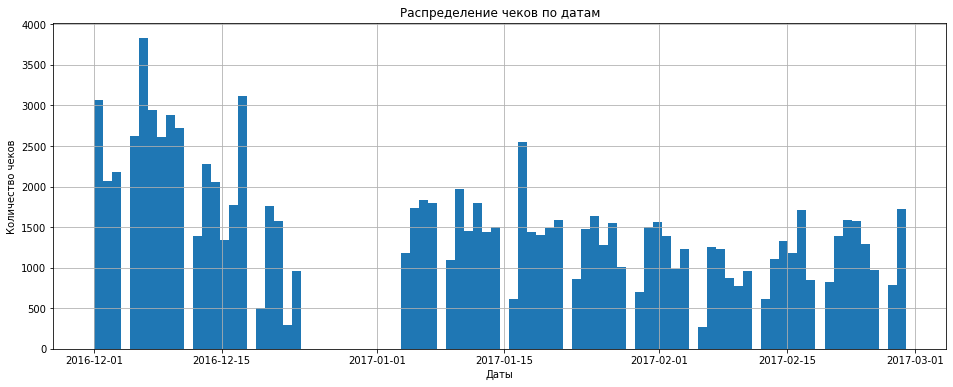

In [23]:
warnings.filterwarnings("ignore")
data['date'].hist(bins=90, figsize = (16, 6));
plt.title('Распределение чеков по датам')
plt.xlabel('Даты')
plt.ylabel('Количество чеков');

Определим минимальную и максимальную дату в базе. Минимальная дата - 01.12.2016 Максимальная дата 28.02.2017. Построим гистограмму распределения всех чеков по датам. Как видно из графика, в торговле сети магазинов присутствует сезонность. В первой половине каждого месяца наблюдается пик продаж. Наиболее ярко он выражен в декабре 2016 г. Пропуски в графике обусловлены выходными и периодом новогодних праздников.

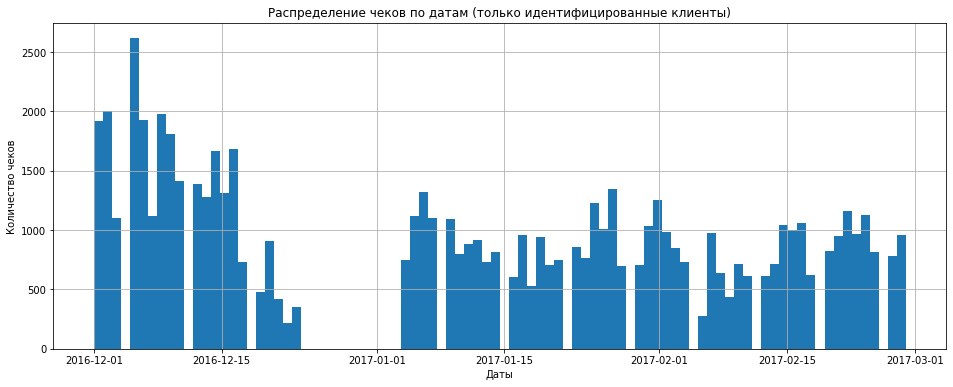

In [24]:
warnings.filterwarnings("ignore")
data_corr['date'].hist(bins=90, figsize = (16, 6));
plt.title('Распределение чеков по датам (только идентифицированные клиенты)')
plt.xlabel('Даты')
plt.ylabel('Количество чеков');

Построим гистограмму распределения чеков по датам только для идентифицированных пользователей. В целом распределения похожи, но есть различия в размерности и распределениях чеков по отдельным неделям.

### Исследование переменных на аномалии. Коррекция переменных в случае необходимости

In [25]:
data['quantity']= data['quantity'].replace(0, np.nan, regex=True) # меняем 0 на nan
data['quantity'] = data.groupby('item_id')['quantity'].apply(lambda x: x.fillna(x.median()))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104300 entries, 0 to 105334
Data columns (total 8 columns):
check_id       104300 non-null object
item_id        104300 non-null object
quantity       103581 non-null float64
datetime       104300 non-null datetime64[ns]
customer_id    68152 non-null object
shop_id        104300 non-null object
loyalty_pr     104300 non-null object
date           104300 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 7.2+ MB


Как уже было выявлено, столбец quantity (количество) содержит нули. Очевидно, что это ошибки в базе, т.к. нет необходимости пробивать нулевые чеки. В целях устранения ошибок заменим нули на медианные значения количеств по соответствующему товару. Проверяем. Обнаружены пропуски в столбце quantity: товары с количеством 0 продавались единственный раз. Их 719 (0,7% от общего количества строк). Т.к. мы не можем восстановить эти пропуски, удаляем их.

In [26]:
data['quantity']= data['quantity'].fillna('n')
data = data[data['quantity'] !='n']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103581 entries, 0 to 105334
Data columns (total 8 columns):
check_id       103581 non-null object
item_id        103581 non-null object
quantity       103581 non-null object
datetime       103581 non-null datetime64[ns]
customer_id    67960 non-null object
shop_id        103581 non-null object
loyalty_pr     103581 non-null object
date           103581 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 7.1+ MB


Удаляем строки с пропусками из столбца quantity. Проверяем.

In [27]:
item_price = codes.groupby('item_id')['price'].mean().reset_index()
item_price.columns = ['item_id', 'price']
item_price.head()

,item_id,price
0,10002,1.38
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [28]:
print(item_price['item_id'].value_counts().head())
item_price.info()

82613A    1
35653     1
22881     1
22757     1
84497     1
Name: item_id, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
item_id    3159 non-null object
price      3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


Как уже было выявлено, в таблице codes есть коды товаров, которым соответствует несколько цен. Рассчитаем новую таблицу цен, где каждому товару будет соответствовать его средняя цена из таблицы codes. Проверяем: каждому товару соответствуе одна цена.

### Объединение таблиц чеков и цен

In [29]:
data = data.merge(item_price, on = 'item_id', how = 'left')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103581 entries, 0 to 103580
Data columns (total 9 columns):
check_id       103581 non-null object
item_id        103581 non-null object
quantity       103581 non-null object
datetime       103581 non-null datetime64[ns]
customer_id    67960 non-null object
shop_id        103581 non-null object
loyalty_pr     103581 non-null object
date           103581 non-null object
price          103581 non-null float64
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 7.9+ MB


,check_id,item_id,quantity,datetime,customer_id,shop_id,loyalty_pr,date,price
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.810000
1,538862,22195,3,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.766667
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.474000
3,543543,22271,5,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.300000
4,543812,79321,7,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.013636


Для расчета выручки объединим таблицы data и item_price. Проверяем.

In [30]:
data_corr = data.dropna()
data_corr.info()
data_corr.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67960 entries, 0 to 103580
Data columns (total 9 columns):
check_id       67960 non-null object
item_id        67960 non-null object
quantity       67960 non-null object
datetime       67960 non-null datetime64[ns]
customer_id    67960 non-null object
shop_id        67960 non-null object
loyalty_pr     67960 non-null object
date           67960 non-null object
price          67960 non-null float64
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 5.2+ MB


,check_id,item_id,quantity,datetime,customer_id,shop_id,loyalty_pr,date,price
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.810000
1,538862,22195,3,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.766667
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.474000
3,543543,22271,5,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.300000
4,543812,79321,7,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.013636


Аналогичные действия проводим для таблицы с массивом данных, очищенных от строк с пропусками.

### Расчет показателей выручки по каждому чеку

In [31]:
data['revenue'] = data['quantity']*data['price']
data_corr['revenue'] = data_corr['quantity']*data_corr['price']
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103581 entries, 0 to 103580
Data columns (total 10 columns):
check_id       103581 non-null object
item_id        103581 non-null object
quantity       103581 non-null object
datetime       103581 non-null datetime64[ns]
customer_id    67960 non-null object
shop_id        103581 non-null object
loyalty_pr     103581 non-null object
date           103581 non-null object
price          103581 non-null float64
revenue        103581 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 8.7+ MB


,check_id,item_id,quantity,datetime,customer_id,shop_id,loyalty_pr,date,price,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.810000,19.91
1,538862,22195,3,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.766667,8.3
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.474000,10.318
3,543543,22271,5,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.300000,21.5
4,543812,79321,7,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.013636,49.0955


In [32]:
data_corr.info()
data_corr.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67960 entries, 0 to 103580
Data columns (total 10 columns):
check_id       67960 non-null object
item_id        67960 non-null object
quantity       67960 non-null object
datetime       67960 non-null datetime64[ns]
customer_id    67960 non-null object
shop_id        67960 non-null object
loyalty_pr     67960 non-null object
date           67960 non-null object
price          67960 non-null float64
revenue        67960 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 5.7+ MB


,check_id,item_id,quantity,datetime,customer_id,shop_id,loyalty_pr,date,price,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.810000,19.91
1,538862,22195,3,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.766667,8.3
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.474000,10.318
3,543543,22271,5,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.300000,21.5
4,543812,79321,7,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.013636,49.0955


Для таблиц data и data_corr рассчитаем показатели выручки по каждой строке чека. Проверяем.

### Расчет общего количества чеков в логе (в целом и по группам: покупатели, участвующие в программе лояльности (ПЛ); покупатели, не участвующие в ПЛ) 

In [33]:
check_full = data[['check_id', 'loyalty_pr']].drop_duplicates()
check_full_count = check_full.count().reset_index()
check_full_count.columns = ['index', 'quant']
check_full_count

,index,quant
0,check_id,4870
1,loyalty_pr,4870


In [34]:
check_full_c = data_corr[['check_id', 'loyalty_pr']].drop_duplicates()
check_full_count_c = check_full_c.count().reset_index()
check_full_count_c.columns = ['index', 'quant']
check_full_count_c

,index,quant
0,check_id,4142
1,loyalty_pr,4142


In [35]:
print('Количество чеков (полные данные)', check_full_count.loc[0, 'quant'])
print('Количество чеков (очищенные данные)', check_full_count_c.loc[0, 'quant'])

Количество чеков (полные данные) 4870
Количество чеков (очищенные данные) 4142


loyalty_pr
0.0    3526
1.0    1344
Name: check_id, dtype: int64


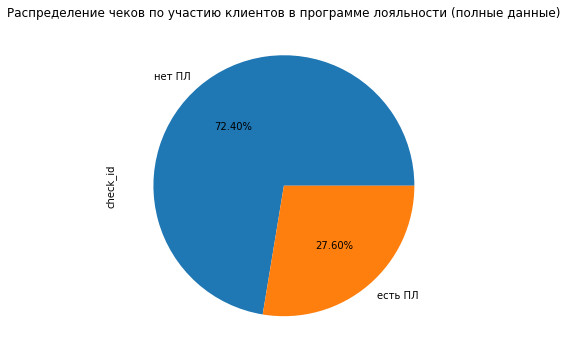

In [36]:
check_cust_prl_1 = check_full.groupby('loyalty_pr')['check_id'].count()
print(check_cust_prl_1)
check_cust_prl_1.plot(kind='pie', figsize=(12, 6), autopct='%1.2f%%', 
                      title = 'Распределение чеков по участию клиентов в программе лояльности (полные данные)',
                     labels =['нет ПЛ', 'есть ПЛ']);

loyalty_pr
0.0    2798
1.0    1344
Name: check_id, dtype: int64


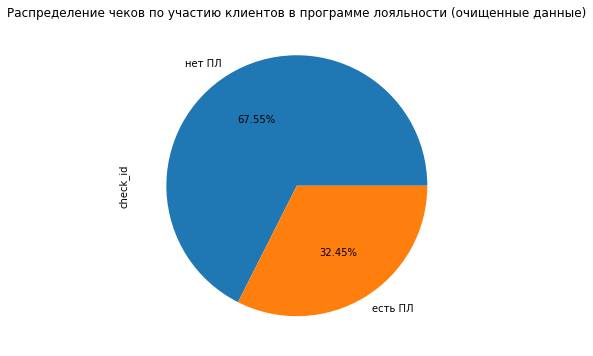

In [37]:
check_cust_prl_2 = check_full_c.groupby('loyalty_pr')['check_id'].count()
print(check_cust_prl_2)
check_cust_prl_2.plot(kind='pie', figsize=(12, 6), autopct='%1.2f%%', 
                      title = 'Распределение чеков по участию клиентов в программе лояльности (очищенные данные)',
                     labels =['нет ПЛ', 'есть ПЛ']);

Рассчитаем количество чеков в базе: по полным данным - 4870 чеков, по очищенным - 4142 чека.
Распределение чеков в зависимости от участия клиентов в программе лояльности (ПЛ):
по полным данным: без ПЛ - 3526, с ПЛ - 1344
по очищенным данным: без ПЛ - 2798, с ПЛ - 1344
При удалении пропусков были исключены только клиенты, не участвующие в программе лояльности.

### Расчет количества покупателей в логе (в целом и по группам: покупатели, участвующие в ПЛ; покупатели, не участвующие в ПЛ) 

Количество клиентов в базе: 1748
loyalty_pr
0.0    1161
1.0     587
Name: customer_id, dtype: int64


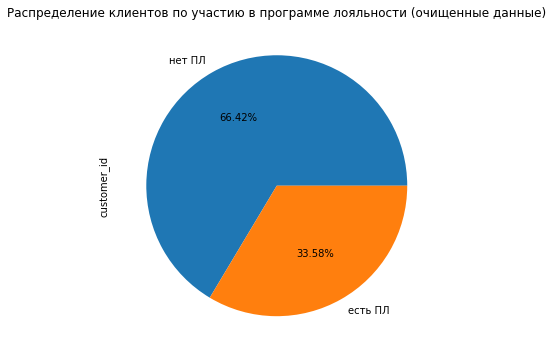

In [38]:
customer_prl = data_corr.loc[:, ['customer_id', 'loyalty_pr']]
customer_prl = customer_prl.drop_duplicates()
print('Количество клиентов в базе:', customer_prl.shape[0])
cust_prl = customer_prl.groupby('loyalty_pr')['customer_id'].count()
print(cust_prl)
cust_prl.plot(kind='pie', figsize=(12, 6), autopct='%1.2f%%', 
                      title = 'Распределение клиентов по участию в программе лояльности (очищенные данные)',
                     labels =['нет ПЛ', 'есть ПЛ']);

Рассчитаем количество клиентов по очищенным данным. Их 1748, из них клиенты без ПЛ - 1161, клиенты с ПЛ - 587.
Следует отметить, что распределение клиентов и чеков по очищенным данным практически идентичны. Таким образом, мы можем сделать вывод о том, что по полным данным будет наблюдаться та же картина. Соответственно, можно рассчитать показатели количества клиентов для полных данных через пропорцию:
если количество клиентов, участвующих в ПЛ - это 27,6% - 587 чел., то
количество клиентов, не участвующих в ПЛ - 72,4% или 1540 чел.
Всего клиентов по полным данным - 2127 чел.

### Расчет количества чеков на 1 покупателя (в целом и по группам: покупатели, участвующие в ПЛ; покупатели, не участвующие в ПЛ)

Количество чеков на 1 покупателя (полные данные:) 2.2896097790314998
0    2.289610
1    2.289608
Name: ch_per_one, dtype: float64


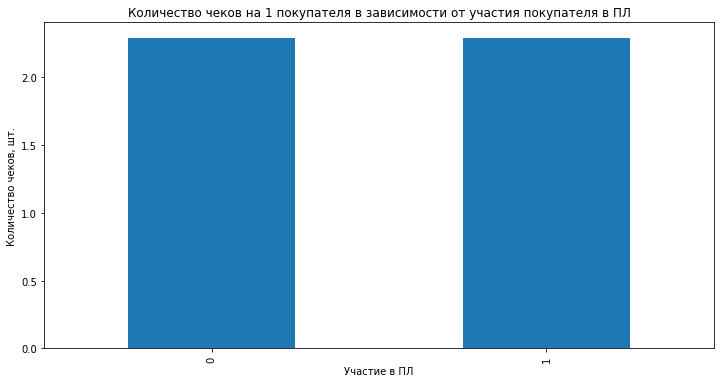

In [39]:
print('Количество чеков на 1 покупателя (полные данные:)', check_full_count.loc[0, 'quant']/2127)
check_cust_prl_1 = check_cust_prl_1.reset_index()
check_cust_prl_1['customers'] = [1540, 587]
check_cust_prl_1['ch_per_one'] =  check_cust_prl_1['check_id']/check_cust_prl_1['customers']
print(check_cust_prl_1['ch_per_one'])
check_cust_prl_1['ch_per_one'].plot(kind='bar', figsize=(12, 6), 
                      title = 'Количество чеков на 1 покупателя в зависимости от участия покупателя в ПЛ')
plt.xlabel("Участие в ПЛ")
plt.ylabel("Количество чеков, шт.");

In [40]:
print('Количество чеков на 1 покупателя (очищенные данные:)', check_full_count_c.loc[0, 'quant']/customer_prl.shape[0])
check_cust_prl_2 = check_cust_prl_2.reset_index()
check_cust_prl_2['customers'] = [1161, 587]
check_cust_prl_2['ch_per_one'] =  check_cust_prl_2['check_id']/check_cust_prl_2['customers']
check_cust_prl_2['ch_per_one']

Количество чеков на 1 покупателя (очищенные данные:) 2.369565217391304


0    2.409991
1    2.289608
Name: ch_per_one, dtype: float64

Рассчитаем количество чеков на 1 покупателя. Для полных данных оно составило 2,3. Как видно из расчета, показатель не зависит от наличия/отсутствия программы лояльности.
Для очищенных данных количество чеков на 1 покупателя составило 2,4. При этом для клиентов, участвующих в ПЛ, этот показатель больше, чем для клиентов, не участвующих в ПЛ, на 0,11 чека. Что обусловлено исключением строк с пропущенными данными по клиентам.

### Расчет количества товаров на 1 покупателя (в целом и по группам: покупатели, участвующие в ПЛ; покупатели, неучаствующие в ПЛ)

Количество товаров на 1 покупателя (полные данные:) 505.89045604137283
loyalty_pr
0.0    526.312987
1.0    452.311755
dtype: float64


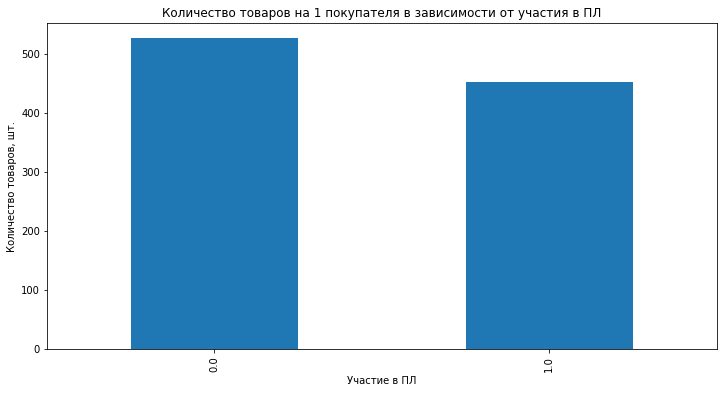

In [41]:
print('Количество товаров на 1 покупателя (полные данные:)', data['quantity'].sum()/2127)
quant_prl_1 = data.groupby('loyalty_pr')['quantity'].sum()/check_cust_prl_1['customers']
print(quant_prl_1)
quant_prl_1.plot(kind='bar', figsize=(12, 6), 
                      title = 'Количество товаров на 1 покупателя в зависимости от участия в ПЛ')
plt.xlabel("Участие в ПЛ")
plt.ylabel("Количество товаров, шт.");

In [42]:
print('Количество товаров на 1 покупателя (очищенные данные:)', data_corr['quantity'].sum()/customer_prl.shape[0])
quant_prl_2 = data_corr.groupby('loyalty_pr')['quantity'].sum()/check_cust_prl_2['customers']
quant_prl_2

Количество товаров на 1 покупателя (очищенные данные:) 496.84267734553777


loyalty_pr
0.0    519.357450
1.0    452.311755
dtype: float64

Рассчитаем количество товаров на 1 покупателя. Для полных данных оно составило 505,9. Как видно из расчета, показатель для клиентов, участвующих в ПЛ, значительно ниже, чем для клиентов, не участвующих в ПЛ.
По очищенным данным аналогичные показатели. Такая ситуация, возможно обусловлена наличием скидок на определенные товары по карте лояльности. Соответсвенно, клиенты, участвующие в ПЛ в основном набирали товары со скидками по карте, тогда как клиенты, не участвующие в ПЛ не были привязаны к скидкам и набирали больше товаров разных видов.

### Расчет средней выручки на 1 покупателя (в целом и по группам: покупатели, участвующие в ПЛ; покупатели, неучаствующие в ПЛ) 

In [43]:
print('Средняя выручка на 1 покупателя (полные данные:)', data['revenue'].sum()/2127)
rev_prl_1 = data.groupby('loyalty_pr')['revenue'].sum()/check_cust_prl_1['customers']# расчет средней выручки по клиентам за 3 мес.
rev_prl_1 = rev_prl_1.reset_index()
rev_prl_1.columns = ['loyalty_pr', 'rev']
rev_prl_1['card'] = [0, 200] # стоимость участия в программе лояльности в месяц
rev_prl_1['rev_sum'] = rev_prl_1['rev']/3+rev_prl_1['card']# расчет суммарной выручки на 1 клиента в месяц
rev_prl_1

Средняя выручка на 1 покупателя (полные данные:) 1652.2154208189884


,loyalty_pr,rev,card,rev_sum
0,0.0,1775.293859,0,591.764620
1,1.0,1329.317984,200,643.105995


In [44]:
print('Средняя выручка на 1 покупателя (очищенные данные:)', data_corr['revenue'].sum()/customer_prl.shape[0])
rev_prl_2 = data_corr.groupby('loyalty_pr')['revenue'].sum()/check_cust_prl_2['customers']
rev_prl_2 = rev_prl_2.reset_index()
rev_prl_2.columns = ['loyalty_pr', 'rev']
rev_prl_2['card'] = [0, 200] # стоимость участия в программе лояльности в месяц
rev_prl_2['rev_sum'] = rev_prl_2['rev']/3+rev_prl_2['card']# расчет суммарной выручки на 1 клиента в месяц
rev_prl_2

Средняя выручка на 1 покупателя (очищенные данные:) 1495.773710031424


,loyalty_pr,rev,card,rev_sum
0,0.0,1579.933496,0,526.644499
1,1.0,1329.317984,200,643.105995


Как видно из расчета по полным данным, средняя выручка на 1 клиента выше, у клиентов, не участвующего в ПЛ.  
По очищенным данным средняя выручка на 1 клиента, не участвующего в ПЛ, существенно также, чем у клиента, участвующего в ПЛ. Данная ситуация, скорее всего, обусловлена как меньшим количеством товаров, так и скидками на товары, приобретаемые клиентами, участвующими в ПЛ. Для клиентов, не участвующих в ПЛ, соответственно, скидок нет и они приобретают большее количества товаров.

Вместе с тем, средняя выручка на клиента в месяц с учетом оплаты участия в программе лояльности выше у клиентов, участвующих в ПЛ.

## 4. Анализ успешности применения программы лояльности

### Построение графика кумулятивной выручки по группам

In [45]:
datesGroups = data[['date','loyalty_pr']].drop_duplicates()
cumulativeData = datesGroups.apply(lambda x: data[np.logical_and(data['date'] <= x['date'], 
data['loyalty_pr'] == x['loyalty_pr'])].agg({'date' : 'max', 'loyalty_pr' : 'max', 'check_id' : pd.Series.nunique, 
'revenue' : 'sum'}), axis=1).sort_values(by=['date','loyalty_pr'])
cumulativeData.columns = ['date', 'group', 'checks', 'revenue']
cumulativeData.head(10)

,date,group,checks,revenue
52,2016-12-01,0.0,89,70756.918677
77,2016-12-01,1.0,49,18593.208565
55,2016-12-02,0.0,190,154691.547786
54,2016-12-02,1.0,115,45307.179011
30,2016-12-03,0.0,272,207361.271996
44,2016-12-03,1.0,140,57704.730671
46,2016-12-05,0.0,341,248734.707300
35,2016-12-05,1.0,166,83962.524072
47,2016-12-06,0.0,430,306863.216763
162,2016-12-06,1.0,210,107246.801852


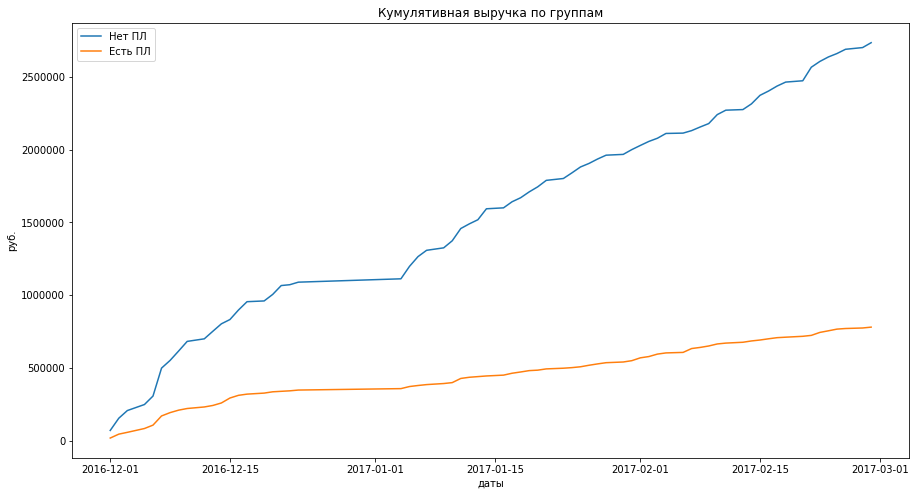

In [46]:
cumulativeRevenue_no_pl = cumulativeData[cumulativeData['group']==0][['date','revenue', 'checks']]
cumulativeRevenue_pl = cumulativeData[cumulativeData['group']==1][['date','revenue', 'checks']]
plt.plot(cumulativeRevenue_no_pl['date'], cumulativeRevenue_no_pl['revenue'], label='Нет ПЛ')# Строим график выручки группы клиентов, не участвующих в ПЛ
plt.plot(cumulativeRevenue_pl['date'], cumulativeRevenue_pl['revenue'], label='Есть ПЛ');# Строим график выручки группы клиентов, участвующих в ПЛ
plt.gcf().set_size_inches(15, 8)
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.xlabel("даты")
plt.ylabel("руб.");


Построим график кумулятивной выручки. Очевидно, что выручка по клиентам, не участвующим в ПЛ будет выше, т.к. их больше. График строился для определения наличия аномальных значений в группах. Как видно, аномалий нет. 

### Построение графика кумулятивного среднего чека по группам. Выводы.

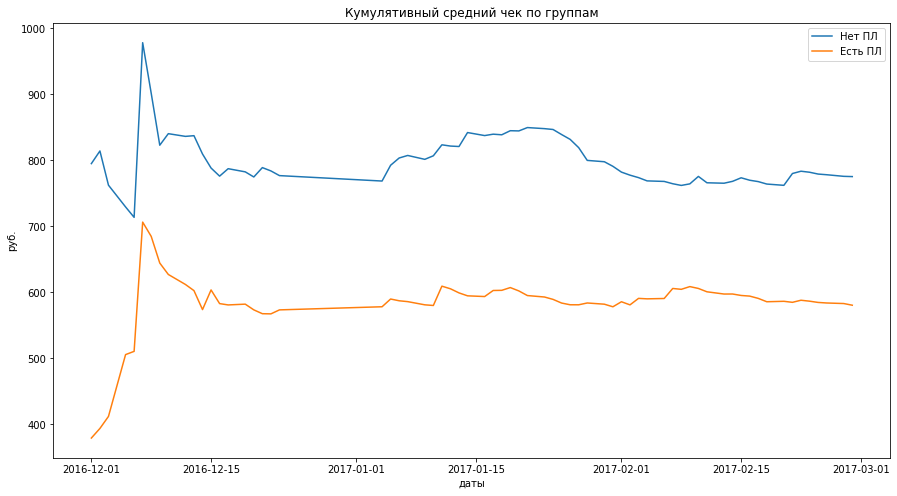

In [47]:
plt.plot(cumulativeRevenue_no_pl['date'], cumulativeRevenue_no_pl['revenue']/cumulativeRevenue_no_pl['checks'], label='Нет ПЛ')
plt.plot(cumulativeRevenue_pl['date'], cumulativeRevenue_pl['revenue']/cumulativeRevenue_pl['checks'], label='Есть ПЛ')
plt.gcf().set_size_inches(15, 8)
plt.title('Кумулятивный средний чек по группам')
plt.legend()
plt.xlabel("даты")
plt.ylabel("руб.");

Построим графики накопленных средних чеков по группам. Графики почти идентичны, но график по клиентам, участвующих в ПЛ располагается ниже графика по клиентам, не участвующих в ПЛ. Разница между графиками колеблется от 200 до 250 руб. Исходя из того, что покупатели из разных групп в среднем покупают приблизительно одинаковые наборы товаров, можно сделать вывод, что участие в программе лояльности (оплата 200 руб. в мес.) себя окупает.

### Построение графика относительного изменения кумулятивного среднего чека группы покупателей, участвующих в ПЛ, к группе покупателей, неучаствующих в ПЛ. Выводы.

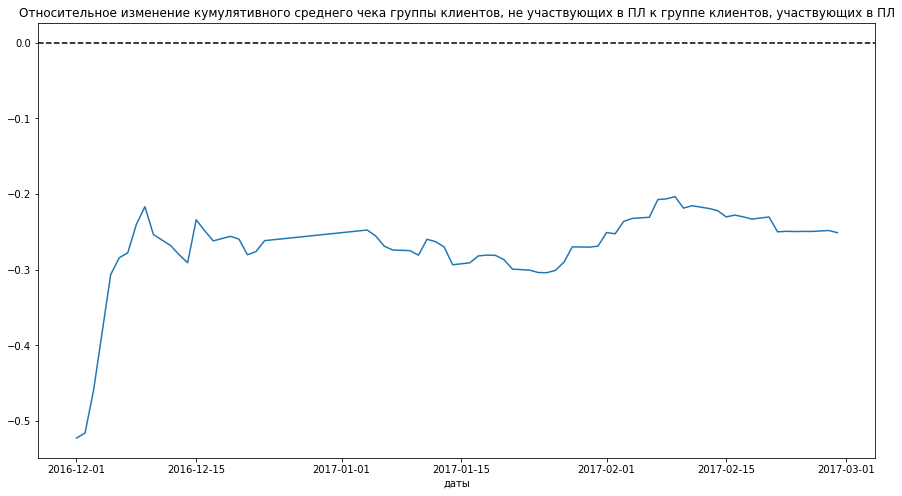

In [48]:
mergedCumulativeRevenue = cumulativeRevenue_no_pl.merge(cumulativeRevenue_pl, left_on='date', 
right_on='date', how='left', suffixes=['0', '1'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenue1']/mergedCumulativeRevenue['checks1'])\
/(mergedCumulativeRevenue['revenue0']/mergedCumulativeRevenue['checks0'])-1)# cтроим отношение средних чеков
plt.axhline(y=0, color='black', linestyle='--'); # добавляем ось X
plt.gcf().set_size_inches(15, 8)
plt.title('Относительное изменение кумулятивного среднего чека группы клиентов, не участвующих в ПЛ к группе клиентов, участвующих в ПЛ')
plt.xlabel("даты");

Построим график относительного изменения кумулятивного среднего чека группы клиентов, не участвующих в ПЛ к группе клиентов, участвующих в ПЛ. График указывает на наличие одного выброса в начале декабря 2016 г. В принципе, учитывая небольшие значения средних чеков, указанный выброс не является критическим.
В остальном график указывает на постоянно существующую стабильную разницу между средними чеками групп, которая лежит в пределах от 20% до 30% суммы среднего чека.

### Построение графика количества купленных товаров по чекам. Выводы.

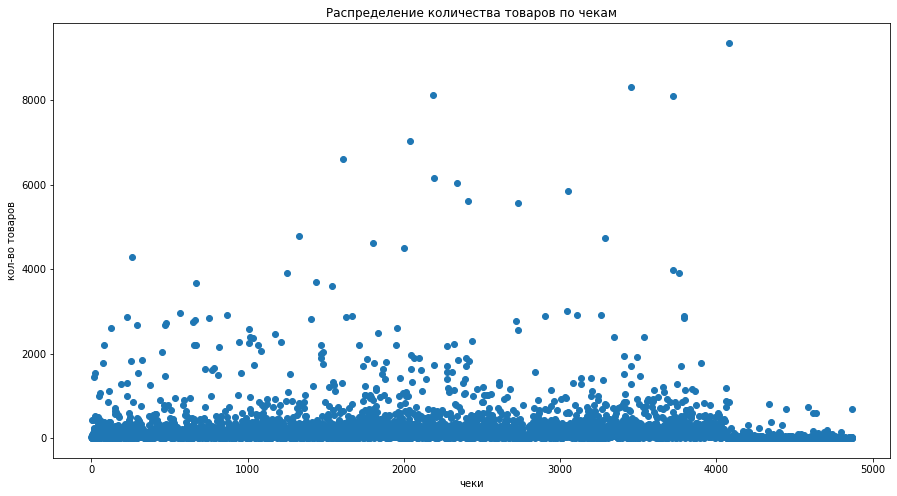

In [49]:
quant_check = data.drop(['loyalty_pr', 'revenue', 'date', 'item_id', 'shop_id', 'datetime','customer_id'], axis=1).\
groupby('check_id', as_index=False).agg({'quantity' : 'sum'})
quant_check.columns = ['check_id','quantity']
x_values = pd.Series(range(0,len(quant_check)))
plt.scatter(x_values, quant_check['quantity']);
plt.gcf().set_size_inches(15, 8)
plt.title('Распределение количества товаров по чекам')
plt.xlabel("чеки")
plt.ylabel("кол-во товаров");

Построим точечную диаграмму распределения количества товаров по чекам. 
Как видно из получившегося графика, большинство покупателей купили менее 500 товаров. Заметную долю также составляют покупатели с количеством товаров от 500 до 2000.
Доля покупателей, купивших больше 2000 товаров, очень мала.

### Расчет 95-го и 99-го перцентилей количества товаров. Выбор границы для определения аномальных покупателей.

In [50]:
print(np.percentile(quant_check['quantity'], [95, 99]))

[ 786.1  2397.62]


Рассчитаем 95% и 99% персентили.
Не более 5% чеков содержат количество товаров больше, чем 786. И 1% чеков содержит более 2398 товаров. 
Рекомендуемая граница определения аномальных пользователей - 1000 товаров. 

### Построение графика сумм чеков. Выводы.

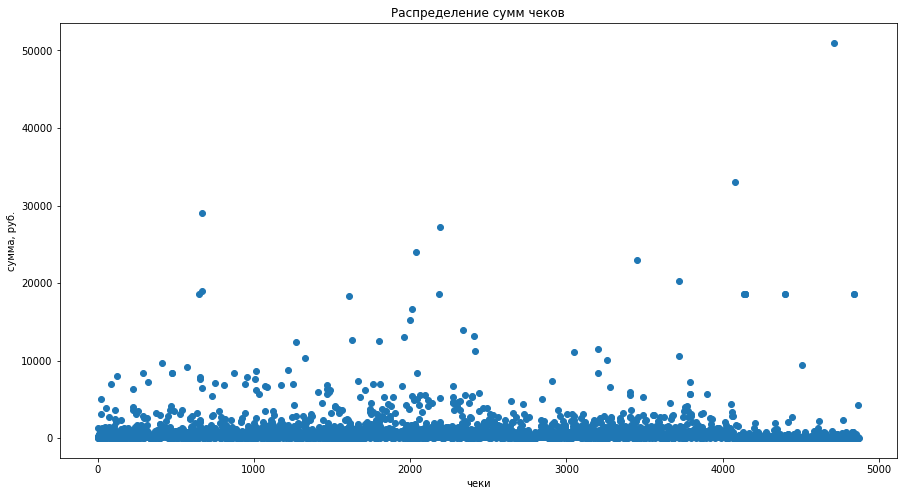

In [51]:
rev_check = data.groupby(['check_id', 'loyalty_pr']).agg({'revenue' : 'sum'}).reset_index()
x_values = pd.Series(range(0,len(rev_check)))
plt.scatter(x_values, rev_check['revenue']);
plt.gcf().set_size_inches(15, 8)
plt.title('Распределение сумм чеков')
plt.xlabel("чеки")
plt.ylabel("сумма, руб.");

Построим точечную диаграмму распределения выручки по чекам. 
Как видно из получившегося графика, большинство покупателей купили товаров на сумму менее 3000 руб. Заметную долю также составляют покупатели с суммой чеков от 3000 до 10000 руб.
Доля покупателей, купивших товаров на сумму больше 10000 руб., очень мала.

### Расчет 95-го и 99-го перцентилей сумм чеков. Выбор границы для определения аномальных чеков.

In [52]:
print(np.percentile(rev_check['revenue'], [95, 99]))

[2431.90609583 7702.9119362 ]


Рассчитаем 95% и 99% персентили.
Не более 5% выручки пришлось на чеки с суммой более 2431,9 руб. И 1% выручки пришелся на чеки с суммой более 7702,9 руб. 
Рекомендуемая граница определения аномальных пользователей - 3000 руб. 

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы.

Проверим нулевую гипотезу по "сырым данным". 
#### Нулевая гипотеза: Средние чеки по группам клиентов равны.
#### Альтернативная гипотеза: средние чеки по группам клиентов не равны.

In [53]:
print("{0:.10f}".format(stats.mannwhitneyu(data[data['loyalty_pr']==0]['revenue'], \
data[data['loyalty_pr']==1]['revenue'])[1]))

0.0000000004


Рассчитаем статистическую значимость различий в среднем чеке клиентов сети магазинов по «сырым» данным с помощью критерия Манна-Уитни. Критерий Манна-Уитни здесь и в дальнейшем применяется в связи с тем, что в данных есть большие (по сравнению с нормальным распределением) выбросы значений, сильно сдвигающие параметрические результаты. Критерий Манна-Уитни - непараметрический: он основан не на числовых значениях переменных, а на их рангах. 


Критерий Манна-Уитни очень мал. Т.е. для уровней значимости 0,05 и 0,01 можно сделать вывод о том, что нулевая гипотеза отвергается. Средние чеки по группам в зависимости от участия в программе лояльности не равны друг другу.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы.

Проверим нулевую гипотезу по "очищенным данным". 
#### Нулевая гипотеза: Средние чеки по группам клиентов равны.
#### Альтернативная гипотеза: средние чеки по группам клиентов не равны.

In [54]:
check_big_quant = data[data['quantity'] > 1000]['check_id']
check_big_rev = data[data['revenue'] > 3000]['check_id']
abnormal_checks = pd.concat([check_big_quant, check_big_rev], axis = 0).drop_duplicates().sort_values()
print(abnormal_checks)

22898      536809
12640      536830
82993      536890
4874       537137
12471      537632
11737      537657
5204       537659
18655      537899
59942      537981
61180      538191
97405      538420
63253      539014
3209       539101
55455      539494
102634     539721
98804      539988
96334      540175
103214     540564
8938       540689
21101      540699
38196      540815
25651      540818
88770      541570
53203      541685
31664      542504
41114      542505
17256      543057
21364      543192
10621      543257
6234       543258
8814       543378
80615      543379
7636       543536
70794      543543
4021       543549
81256      543669
92510      543842
83499      543991
83561      544152
102994     544612
50212      544649
57617      544673
73421      544793
84699      545182
38939     C536757
66997     C537600
24347     C537630
35551     C537644
59157     C537647
34468     C537651
1176      C537652
8073      C540117
58237     C540118
86330     C541284
26206     C543624
62278     

In [55]:
print("{0:.11f}".format(stats.mannwhitneyu(data[np.logical_and(data['loyalty_pr']==0, 
    np.logical_not(data['check_id'].isin(abnormal_checks)))]['revenue'],
    data[np.logical_and(data['loyalty_pr']==1, 
    np.logical_not(data['check_id'].isin(abnormal_checks)))]['revenue'])[1]))

0.00000000007


Для решения задачи определим аномальные чеки, количество товаров в которых превышало 1000, а сумма превышала 3 тыс. руб. Таких оказалось 57. Исключаем их из групп.
Расчитаем статистическую значимость различий в среднем чеке между группами по очищенным данным с помощью критерия Манна-Уитни.
Значение критерия снизилось по сравнению со своим аналогом для "сырых" данных.
Нулевая гипотеза о равенстве сумм средних чеков отвергается для как для уровня значимости 0,05, так и для уровня значимости 0,01.

### Расчет статистической значимости различий среднего количества товаров в чеке между группами

#### Нулевая гипотеза: Средние количества товаров в чеках по группам клиентов равны.
#### Альтернативная гипотеза: Средние количества товаров в чеках по группам клиентов не равны.

In [56]:
quant_check = data.groupby(['check_id', 'loyalty_pr']).agg({'quantity' : 'sum'}).reset_index()
quant_check.head()

,check_id,loyalty_pr,quantity
0,536365,1.0,33.0
1,536366,1.0,10.0
2,536367,0.0,71.0
3,536368,0.0,11.0
4,536369,0.0,2.0


In [57]:
print("{0:.10f}".format(stats.mannwhitneyu(quant_check[quant_check['loyalty_pr']==0]['quantity'], \
quant_check[quant_check['loyalty_pr']==1]['quantity'])[1]))

0.0308667009


Рассчитаем статистическую значимость различий среднего количества товаров в чеке клиентов сети магазинов по «сырым» данным с помощью критерия Манна-Уитни. Критерий Манна-Уитни применяется в связи с тем, что в данных есть большие (по сравнению с нормальным распределением) выбросы значений, сильно сдвигающие параметрические результаты.


Значение критерия равно 0.031. Т.е. для уровня значимости 0,05 нулевая гипотеза отвергается, а для уровня значимости 0,01 может быть принята. Рассчитаем значение критерия по очищенным данным.

In [58]:
print("{0:.10f}".format(stats.mannwhitneyu(quant_check[np.logical_and(quant_check['loyalty_pr']==0, 
    np.logical_not(quant_check['check_id'].isin(abnormal_checks)))]['quantity'],
    quant_check[np.logical_and(quant_check['loyalty_pr']==1, 
    np.logical_not(quant_check['check_id'].isin(abnormal_checks)))]['quantity'])[1]))

0.0652196039


Для решения задачи используем таблицу аномальных чеков, полученную ранее. Аномальные чеки исключаются из сравнения.
Расчитаем статистическую значимость различий среднего количества товаров в чеке между группами по очищенным данным с помощью критерия Манна-Уитни.

Значение критерия выросло по сравнению со своим аналогом для "сырых" данных до 0,065.
Нулевая гипотеза о равенстве среднего количества товаров в чеке по группам клиентов не отвергается для как для уровня значимости 0,05, так и для уровня значимости 0,01.
Средние количества товаров в чеках для клиентов, участвующих в ПЛ, и для клиентов, не участвующих в ПЛ, могут быть равны.

## 5. Анализ эффективности работы магазинов сети

### Расчет суммарной выручки по каждому магазину

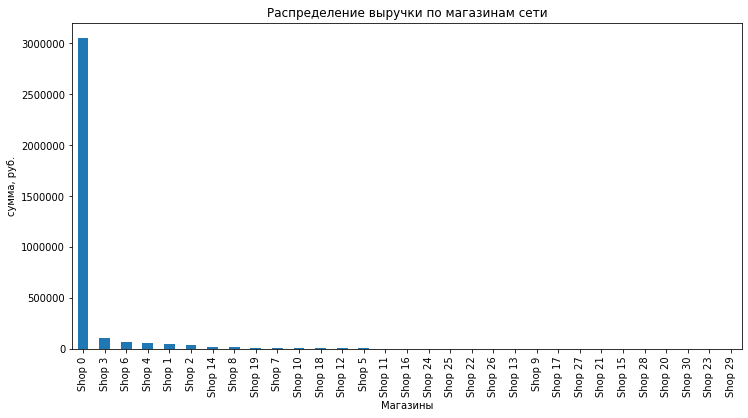

In [59]:
shop_revenue = data.groupby('shop_id')['revenue'].sum().sort_values(ascending = False)
shop_revenue.plot(kind = 'bar', figsize=(12, 6), title = 'Распределение выручки по магазинам сети')
plt.xlabel("Магазины")
plt.ylabel("сумма, руб.");

Рассчитаем суммарную выручку по каждому магазину.
Как видно из графика, почти вся выручка приходится на 1 магазин (shop 0). Еще 5 магазинов имеют определенную перспективу в случае проведения рекламных и маркетинговых акций: их выручка превышает 50 тыс. руб. (хотя это тоже очень мало). В содержании еще 25 магазинов смысла нет: если за 3 месяца они не смогли продать товара на 50 000 руб., то их существование можно объяснить только стратегическими планами сети по дальнейшему развитию.

### Распределение магазинов по группам в зависимости от объема выручки

In [60]:
shop_revenue = shop_revenue.reset_index()
def s_rev(inf): # категоризация магазинов по выручке
    rev = inf['revenue']
    if rev > 1000000:
        return '1'
    return '2'
shop_revenue['group'] = shop_revenue.apply(s_rev, axis = 1)
shop_revenue

,shop_id,revenue,group
0,Shop 0,3.048591e+06,1
1,Shop 3,1.044630e+05,2
2,Shop 6,7.205313e+04,2
3,Shop 4,5.956697e+04,2
4,Shop 1,5.058459e+04,2
5,Shop 2,4.075000e+04,2
6,Shop 14,2.368850e+04,2
7,Shop 8,1.989526e+04,2
8,Shop 19,1.170990e+04,2
9,Shop 7,1.121460e+04,2


Учитывая ранее полученное распределение магазинов по выручке, магазины можно распределить на 2 группы: магазины с большой выручкой (shop 0) и магазины с маленькой выручкой (30 остальных).

## Определение среднего количества покупателей по каждой группе магазинов

In [61]:
shop_revenue_2 = shop_revenue[['shop_id', 'group']]
data = data.merge(shop_revenue_2, on = 'shop_id', how = 'left')
data.head()

,check_id,item_id,quantity,datetime,customer_id,shop_id,loyalty_pr,date,price,revenue,group
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.810000,19.91,1
1,538862,22195,3,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.766667,8.3,1
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.474000,10.318,1
3,543543,22271,5,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.300000,21.5,1
4,543812,79321,7,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.013636,49.0955,1


In [62]:
check_data = data[['check_id', 'group']].drop_duplicates()# выделение уникальных чеков по группам магазинов
check_data.info()
check_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 103411
Data columns (total 2 columns):
check_id    4870 non-null object
group       4870 non-null object
dtypes: object(2)
memory usage: 114.1+ KB


,check_id,group
0,538280,1
1,538862,1
2,538855,1
3,543543,1
4,543812,1


In [63]:
check_quantity = check_data.groupby('group')['check_id'].count().reset_index()# расчет количества чеков по группам магазинов
check_quantity

,group,check_id
0,1,4447
1,2,423


In [64]:
distr_shop = shop_revenue.groupby('group')['shop_id'].count().reset_index()
distr_shop

,group,shop_id
0,1,1
1,2,30


In [65]:
check_quantity['shops'] = distr_shop['shop_id']
check_quantity['customers'] = round(check_quantity['check_id']/check_quantity['check_id'].sum()*\
check_cust_prl_1['customers'].sum(),0)
check_quantity['mean_cust'] = check_quantity['customers']/check_quantity['shops']# расчет среднего количества клиентов по группам магазинов
check_quantity

,group,check_id,shops,customers,mean_cust
0,1,4447,1,1942.0,1942.000000
1,2,423,30,185.0,6.166667


Для расчета среднего количества покупателй рассчитаем количество чеков по каждой группе магазинов.
Через пропорцию отношения общего количества чеков к общему количеству покупателей сети рассчитаем количество покупателй по каждой группе магазинов.
Таким образом, т.к. в первой группе 1 магазин, среднее количество покупателй составило 1942 чел., во второй группе среднее количестов покупателей 6.2 чел.

## Определение суммы среднего чека по каждой группе магазинов

In [66]:
check_sum = data.groupby('group')['revenue'].sum().reset_index()
check_sum

,group,revenue
0,1,3.048591e+06
1,2,4.656709e+05


In [67]:
check_sum['mean_sum'] = check_sum['revenue']/check_quantity['check_id']
check_sum

,group,revenue,mean_sum
0,1,3.048591e+06,685.538847
1,2,4.656709e+05,1100.876941


Рассчитае величину среднего чека по группам магазинов. По группе 1 показатель составил 685,54 руб., по группе 2 - 1100,88 руб.

## Определение процента, покупателей, участвующих в программе лояльности, по каждой группе магазинов

In [68]:
loyal = data[['customer_id', 'loyalty_pr', 'group', 'shop_id']]
loyal = loyal[loyal['loyalty_pr']==1].drop_duplicates()
pr_l_cust = loyal.groupby('group')['customer_id'].count().reset_index()
pr_l_cust['loyal_per_cent'] = pr_l_cust['customer_id']/check_quantity['customers']*100
pr_l_cust

,group,customer_id,loyal_per_cent
0,1,584,30.072091
1,2,3,1.621622


Рассчитаем процент, покупателей, участвующих в программе лояльности, по каждой группе магазинов. По группе магазинов 1 в ПЛ участвует 30,1% покупателей, по группе 2 - 1,6%.

In [69]:
print(loyal['shop_id'].unique())

['Shop 0' 'Shop 8' 'Shop 28' 'Shop 19']


Программа лояльности действует в магазинах 0, 8, 19 и 28.

## 6. Общие выводы

1. В торговле сети магазинов присутствует сезонность. Это видно по графикам ежедневных продаж. В декабре продажи существенно выше, чем в январе, а в январе немого выше, чем в феврале.
2. Клиентов, участвующих в программе лояльности чуть больше четверти от общего числа клиентов (27,6%).
3. Количество чеков на 1 клиента не зависит от участия в программе лояльности.
4. Количество товаров на 1 покупателя выше у клиентов, не участвующих в программе лояльности. Такая ситуация, возможно обусловлена наличием скидок на определенные товары по карте лояльности. Соответсвенно, клиенты, участвующие в ПЛ в основном набирали товары со скидками по карте, тогда как клиенты, не участвующие в ПЛ не были привязаны к скидкам и набирали больше товаров разных видов.
5. Средняя выручка на 1 клиента также выше у клиентов, не участвующих в ПЛ. Данная ситуация, скорее всего, обусловлена как меньшим количеством товаров, так и скидками на товары, приобретаемые клиентами, участвующими в ПЛ. Для клиентов, не участвующих в ПЛ, соответственно, скидок нет и они приобретают большее количества товаров. 
6. Вместе с тем, средняя выручка на клиента в месяц с учетом оплаты участия в программе лояльности выше у клиентов, участвующих в ПЛ.
7. Проверка нулевых гипотез о равенстве средних чеков в зависимости от участия клиентов в программе лояльности покзала, что и по "сырым" и по очищенным данным нулевые гипотезы были отвергнуты. Сумма среднего чека для клиентов,не участвующих в ПЛ, выше, чем у клиентов участвующих в ПЛ.
8. Проверка нулевых гипотез о равенстве среднего количества товаров в чеках в зависимости от участия клиентов в программе лояльности покзала, что нулевая гипотеза не отвергается. Средние количества товаров в чеке для клиентов,не участвующих в ПЛ, и клиентов, участвующих в ПЛ, могут быть равны.
9. Несмотря на вывод из п. 7, программа лояльности работает и приносит выручку на 1 клиента выше аналогичного показателя для клиентов, не учатвующих в ПЛ, на 51,35 руб. в месяц.
10. Подавляющее большинство магазинов сети не эффективны.
11. Только один магазин приносит выручку более 1 млн. руб. Еще 5 магазинов приносят выручку от 50 т.р. до 150 т.р. 
12. Наиболее крупный магазин сети за 3 мес. посетило 1942 чел., каждый из оставшихся 30 магазинов за 3 месяца посетило по 6 чел.
13. Доля клиентов, участвующих в ПЛ для наиболее крупного магазина составила - 30,1% от всех покупателей, для оставшихся 30 магазинов - 1,6%.

Рекомендации:
1. Программу лояльности рекомендуется не менять, можно немного повысить стоимость участия в ней (на 10-15%), а также провести недогрогую рекламную кампанию (наружная реклама на магазинах, раздача листовок) с целью информирования населения о выгодах программы.
2. Учитывая низкую эффективность большинства магазинов, рекомендуется закрыть 25 из них - с наименьшей выручкой.
3. В отношении оставшихся 6 магазинов провести недогрогую рекламную кампанию с целью информирования населения о сети магазинов, ценах, акциях и т.п.